In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from tensorflow.keras.utils import to_categorical, plot_model
import os

In [19]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])
#1-tomoto
#0-apple

OneHotEncoder()

# DATASET CREATION¶

* edible mushroom

In [23]:
data = []
paths = []
results= []
for r,d,f in os.walk(r"C:\Users\User\OneDrive\mush\Edible"):
    for file in f:
        if'.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)#extracting pixel values from image object
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[1]]).toarray())

In [25]:
paths=[]
for r,d,f in os.walk(r"C:\Users\User\OneDrive\mush\Poisonous"):
    for file in f:
        if '.jpg' in file or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[0]]).toarray())

In [27]:
data=np.array(data)#list to array conversion
data.shape

(542, 128, 128, 3)

In [31]:
results=np.array(results)
results=results.reshape(542,2)

# visualization

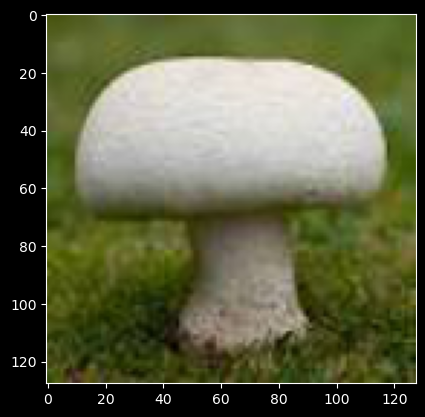

In [48]:
plt.imshow(data[5])

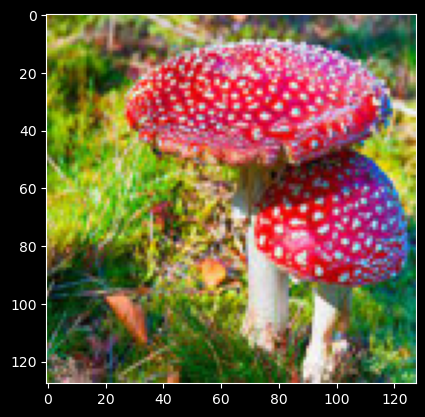

In [46]:
plt.imshow(data[290])

# Data Splitting

In [51]:
x_train,x_test,y_train,y_test=train_test_split(data,results,test_size=0.2,shuffle=True,random_state=0)

# Model creation using sequential method(cnn model)¶


In [54]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


#### model configuration

In [57]:
model.compile(loss="binary_crossentropy",optimizer='sgd',metrics=['accuracy'])

In [59]:
x_train.shape

(433, 128, 128, 3)

In [61]:
y_train.shape

(433, 2)

## model training

In [64]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=2,validation_data=(x_test,y_test))

Epoch 1/20
7/7 - 21s - 3s/step - accuracy: 0.5635 - loss: 3.4345 - val_accuracy: 0.5688 - val_loss: 1.0972
Epoch 2/20
7/7 - 16s - 2s/step - accuracy: 0.7436 - loss: 0.5715 - val_accuracy: 0.7064 - val_loss: 0.5319
Epoch 3/20
7/7 - 15s - 2s/step - accuracy: 0.8014 - loss: 0.4254 - val_accuracy: 0.6972 - val_loss: 0.5365
Epoch 4/20
7/7 - 15s - 2s/step - accuracy: 0.8129 - loss: 0.4026 - val_accuracy: 0.6055 - val_loss: 0.5388
Epoch 5/20
7/7 - 15s - 2s/step - accuracy: 0.8268 - loss: 0.4006 - val_accuracy: 0.8073 - val_loss: 0.5021
Epoch 6/20
7/7 - 15s - 2s/step - accuracy: 0.8753 - loss: 0.2926 - val_accuracy: 0.8807 - val_loss: 0.4385
Epoch 7/20
7/7 - 16s - 2s/step - accuracy: 0.8684 - loss: 0.2837 - val_accuracy: 0.9083 - val_loss: 0.4315
Epoch 8/20
7/7 - 15s - 2s/step - accuracy: 0.9099 - loss: 0.2396 - val_accuracy: 0.8899 - val_loss: 0.4172
Epoch 9/20
7/7 - 15s - 2s/step - accuracy: 0.9122 - loss: 0.2158 - val_accuracy: 0.8991 - val_loss: 0.4120
Epoch 10/20
7/7 - 16s - 2s/step - acc

In [69]:
score=model.evaluate(x_test,y_test,batch_size=64)
print("\nTest accuracy:%.1f%%" % (100.0*score[1]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.9450 - loss: 0.2864

Test accuracy:94.5%
